In [1]:
# Import 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier

In [2]:
# Import training dataset and print some info
df = pd.read_csv("training_set_VU_DM.csv")
print("Size:", df.size)
print("Shape:", df.shape)
print("Number of Dimensions:", df.ndim)

Size: 56623050
Shape: (1048575, 54)
Number of Dimensions: 2


In [4]:
# Print the training dataset
print(df)

         srch_id            date_time  site_id  visitor_location_country_id  \
0              1  2013-04-04 08:32:15       12                          187   
1              1  2013-04-04 08:32:15       12                          187   
2              1  2013-04-04 08:32:15       12                          187   
3              1  2013-04-04 08:32:15       12                          187   
4              1  2013-04-04 08:32:15       12                          187   
...          ...                  ...      ...                          ...   
1048570    70004  2013-06-01 17:02:13        5                          219   
1048571    70004  2013-06-01 17:02:13        5                          219   
1048572    70004  2013-06-01 17:02:13        5                          219   
1048573    70004  2013-06-01 17:02:13        5                          219   
1048574    70004  2013-06-01 17:02:13        5                          219   

         visitor_hist_starrating  visitor_hist_adr_

In [5]:
# Check for missing data
df.isnull().sum()
# Remove features with high NaN (visitor_hist_starring, visitor_hist_adr_usd, etc.) and impute feature data with low NaN (prop_review_score, prop_location_score2, orig_destination_distance)?

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating         994835
visitor_hist_adr_usd            994638
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 1484
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2            229372
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score       981100
orig_destination_distance

C:\Users\hattu\AppData\Local\Temp\ipykernel_15220\1426068489.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='booking_bool',data=df, palette='hls')


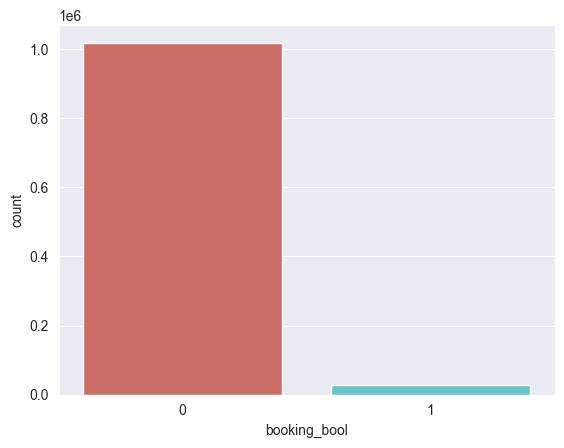

booking_bool
0    1019490
1      29085
Name: count, dtype: int64

In [4]:
# Visualize the target variable click_bool (because we want to optimize clicks)
sns.countplot(x='booking_bool',data=df, palette='hls')
plt.show()
df['booking_bool'].value_counts()

In [7]:
# Preprocessing

# Drop features with high NaN
threshold = 350000
df_new = df.dropna(axis=1, thresh=df.shape[0]-threshold)
df_new = df_new.drop(["date_time", "prop_location_score2"], axis=1)

# Handle missing values (if any)
df_new.fillna(0, inplace=True)

print("Shape:", df_new.shape)
print("Column Names:", df_new.columns.tolist())
print(df_new)

Shape: (1048575, 24)
Column Names: ['srch_id', 'site_id', 'visitor_location_country_id', 'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag', 'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool', 'orig_destination_distance', 'random_bool', 'click_bool', 'booking_bool']
         srch_id  site_id  visitor_location_country_id  prop_country_id  \
0              1       12                          187              219   
1              1       12                          187              219   
2              1       12                          187              219   
3              1       12                          187              219   
4              1       12                          187              219   
...          ...      ...                 

In [17]:

print(df_new.shape)
df_new['Comparison'] = df_new['click_bool'] == df_new['booking_bool']
# Count the number of True values in the Comparison column
true_count = df_new['Comparison'].sum()

print("Number of True values:", true_count)

(1048575, 23)
Number of True values: 1030794
